In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy import misc, ndimage
import glob
import matplotlib.image as mpimg
import cv2

#from transform_image_data import centre_crop

%matplotlib inline

In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
print(tf.__version__)

Default GPU Device:/device:GPU:0
2.1.0


In [3]:
#import Data

train_folder = "C:/Users/Hameez/.conda/envs/gemstone_dataset/Data/Train/"
test_folder = "C:/Users/Hameez/.conda/envs/gemstone_dataset/Data/Test/"


# img = image.load_img(train_folder+"/Alexandrite/alexandrite_2.jpg")
# # plt.imshow(img)
# # plt.show()
# print(cv2.imread("Data/Train/Alexandrite/alexandrite_24.jpg").shape)

#------------Image augmentation for train images----------------------------------#
train = ImageDataGenerator(rescale=1/255, shear_range=0.5,
                                  rotation_range=90, channel_shift_range=2.5)
#---------------------------------------------------------------------------#

test = ImageDataGenerator(rescale=1/255)

im_height = im_width = 256

train_data = train.flow_from_directory(train_folder,
                                       target_size=(im_height,im_width),
                                       class_mode='categorical')
test_data = test.flow_from_directory(test_folder,
                                       target_size=(im_height,im_width),
                                       class_mode='categorical')





Found 5714 images belonging to 87 classes.
Found 363 images belonging to 87 classes.


In [4]:
# images = []
# stone = 'Ametrine'
# for img_path in glob.glob(train_folder+stone+'/*.jpg'):
#     images.append(mpimg.imread(img_path))

# plt.figure(figsize=(25,25))
# columns = 4
# for i, image in enumerate(images):
#     if i > 7:
#         break
#     else:
#         plt.subplot(len(images) / columns + 1, columns, i + 1)
#         plt.title(stone)
#         plt.imshow(image)
        

In [5]:
# test_augment = ImageDataGenerator(rescale=1/255, zoom_range=2.0, shear_range=0.5,
#                                   rotation_range=60, channel_shift_range=2.5)#, ,)
# img = image.load_img(train_folder+"/Chalcedony/chalcedony_5.jpg")
# plt.imshow(img)



In [6]:

# x = img_to_array(x)

# x = x.reshape((1,) + x.shape)
# # x.shape

# i = 0
# for batch in test_augment.flow(x, batch_size=1,
#                               save_to_dir='Augmented', save_prefix='alexandrite',
#                                save_format='jpeg',):
#     i += 1
#     if i > 20:
#         break

### CNN Model 

In [7]:

cnn_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(im_height,im_width,3)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
#                                         tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
#                                         tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Flatten(),
                                        ##
                                        tf.keras.layers.Dense(64, activation='relu'),
#                                                               kernel_regularizer=tf.keras.regularizers.l1(0.01), 
#                                                               activity_regularizer=tf.keras.regularizers.l2(0.01)),
                                        ##
                                        tf.keras.layers.Dense(128, activation='relu'),
                                        #
                                        tf.keras.layers.Dense(256, activation='relu'),
                                        #
                                        tf.keras.layers.Dense(512, activation='relu'),
                                        #
                                        tf.keras.layers.Dense(87, activation='softmax')
                                        ])
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [8]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

history = cnn_model.fit_generator(train_data, epochs=100, validation_data=test_data, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 179 steps, validate for 12 steps
Epoch 1/100
179/179 [==============================] - 161s 898ms/step - loss: 3.9510 - accuracy: 0.0369 - val_loss: 3.5140 - val_accuracy: 0.0496
Epoch 2/100
179/179 [==============================] - 245s 1s/step - loss: 3.1877 - accuracy: 0.0956 - val_loss: 2.8109 - val_accuracy: 0.1818
Epoch 3/100
179/179 [==============================] - 236s 1s/step - loss: 2.6909 - accuracy: 0.1811 - val_loss: 2.4449 - val_accuracy: 0.2039
Epoch 4/100
179/179 [==============================] - 244s 1s/step - loss: 2.3932 - accuracy: 0.2336 - val_loss: 2.3824 - val_accuracy: 0.2204
Epoch 5/100
179/179 [==============================] - 237s 1s/step - loss: 2.2039 - accuracy: 0.2798 - val_loss: 2.1754 - val_accuracy: 0.2810
Epoch 6/100
179/179 [==============================] - 239s 1s/step - loss: 2.0779 - accuracy: 0.3236 - val_

179/179 [==============================] - 234s 1s/step - loss: 0.5351 - accuracy: 0.8052 - val_loss: 1.9628 - val_accuracy: 0.5758
Epoch 55/100
179/179 [==============================] - 236s 1s/step - loss: 0.5236 - accuracy: 0.8043 - val_loss: 1.8566 - val_accuracy: 0.6033
Epoch 56/100
179/179 [==============================] - 193s 1s/step - loss: 0.5422 - accuracy: 0.8021 - val_loss: 2.3332 - val_accuracy: 0.5675
Epoch 57/100
179/179 [==============================] - 244s 1s/step - loss: 0.5843 - accuracy: 0.7893 - val_loss: 1.8017 - val_accuracy: 0.6033
Epoch 58/100
179/179 [==============================] - 237s 1s/step - loss: 0.5454 - accuracy: 0.8052 - val_loss: 1.9293 - val_accuracy: 0.6253
Epoch 59/100
179/179 [==============================] - 238s 1s/step - loss: 0.5497 - accuracy: 0.8099 - val_loss: 1.8051 - val_accuracy: 0.5950
Epoch 60/100
179/179 [==============================] - 239s 1s/step - loss: 0.5132 - accuracy: 0.8180 - val_loss: 2.0177 - val_accuracy: 0.581

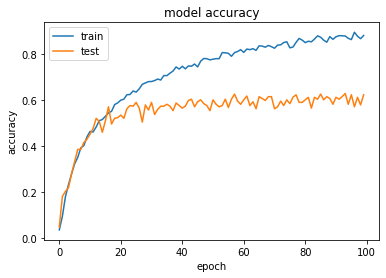

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

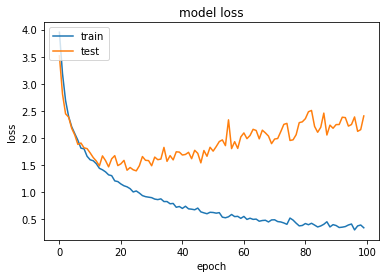

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:

model_path ='Saved Models/gs_mcl_v2.L1_50ep.h5'
cnn_model.save(model_path)

model = tf.keras.models.load_model(model_path)

peridot.jpg


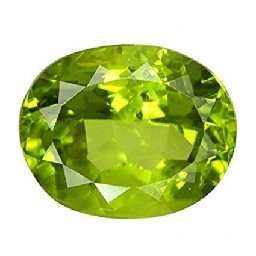

In [16]:
shape = (im_height,im_width)
unsean_stone_path = "C:/Users/Hameez/.conda/envs/gemstone_dataset/Data/Unseen/peridot.jpg"
    
# #img = cv2.imread(os.path.join(unsean_stones_folder)
img = image.load_img(unsean_stone_path, target_size=shape)
#new_img = centre_crop(img, 25)
img_arr = image.img_to_array(img)
print(os.path.basename(unsean_stone_path))
img

In [17]:
img_arr = np.expand_dims(img_arr, axis=0)
prediction = model.predict_classes(img_arr)
classess = train_data.class_indices
for name in classess:
    if classess[name] == int(prediction):
        print("Predicts that its a: "+name)
    else:
        "Couldn't find stone name!"


Predicts that its a: Peridot
